work flow:-
1)dataset
2)image processing
3)train-test split
4)CNN(convoution neural network)
5)evaluation

In [ ]:
!pip install kaggle


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 MB 25.2 MB/s eta 0:00:00


In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


importing Face Mask Dataset

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset



Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#extracting the compressed file
from zipfile import ZipFile # to create, read, extract, and modify ZIP files in Python.
dataset = '/content/face-mask-dataset.zip'
# Open the ZIP file in read ('r') mode
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  sample_data


Importing the dependencies

In [ ]:
import os
import numpy as np # as we will convert these images into numpy arrays
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# for visualising the images
import cv2  #used for image processing and all the other tasks related to image
from google.colab.patches import cv2_imshow #cv2_imshow does like it creates a new window and displays your image in it
from PIL import Image # so pillow is another image processing libary
from sklearn.model_selection import train_test_split # this function is used to split our data into training and testing data

In [ ]:
with_mask_files=os.listdir('/content/data/with_mask')# so listdir will create a list which will consists of all the file names of with_mask_folder
print(with_mask_files[0:10])
print(with_mask_files[-5:])

['with_mask_128.jpg', 'with_mask_1944.jpg', 'with_mask_1517.jpg', 'with_mask_626.jpg', 'with_mask_586.jpg', 'with_mask_103.jpg', 'with_mask_2239.jpg', 'with_mask_3473.jpg', 'with_mask_143.jpg', 'with_mask_88.jpg']
['with_mask_43.jpg', 'with_mask_1714.jpg', 'with_mask_248.jpg', 'with_mask_2420.jpg', 'with_mask_3629.jpg']


In [ ]:
without_mask_files=os.listdir('/content/data/without_mask')
print(without_mask_files[0:10])
print(without_mask_files[-5:])

['without_mask_3664.jpg', 'without_mask_1248.jpg', 'without_mask_2908.jpg', 'without_mask_3620.jpg', 'without_mask_3161.jpg', 'without_mask_474.jpg', 'without_mask_1938.jpg', 'without_mask_551.jpg', 'without_mask_1380.jpg', 'without_mask_380.jpg']
['without_mask_731.jpg', 'without_mask_2259.jpg', 'without_mask_3706.jpg', 'without_mask_1491.jpg', 'without_mask_2845.jpg']


In [ ]:
print('number of masked images:',len(with_mask_files))
print('number of unmasked images:',len(without_mask_files))


number of masked images: 3725
number of unmasked images: 3828


**creating labels for the two classes of image**

with_mask --> 1 ,
without_mask --> 0

In [ ]:
#create the labels
with_mask_labels = [1]*3725
without_mask_labels=[0]*3828

In [ ]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
labels = with_mask_labels + without_mask_labels # so when we add two lists like this,there values are not added ,but instead these two lists get combined
print(len(with_mask_labels))
print(len(without_mask_labels))
print(len(labels))
print(labels[0:5])
print(labels[-5:])

3725
3828
7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the images**

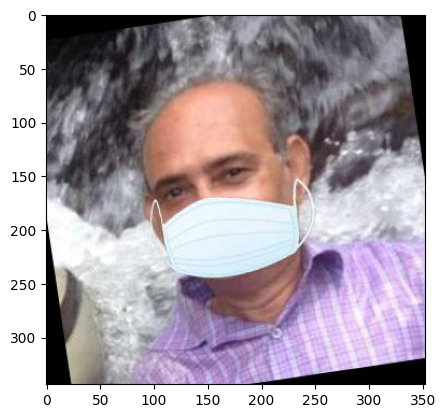

In [ ]:
#using matplotlib
#displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1898.jpg')#imread,first reading the image as numpy array
imgplot = plt.imshow(img)# and then displaying it in matplot
plt.show()

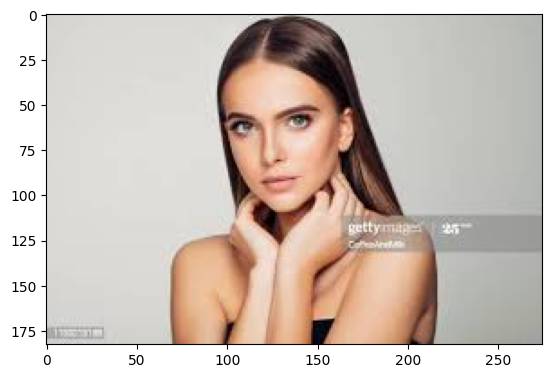

In [ ]:
#displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_3048.jpg')#imread,first reading the image as numpy array
imgplot = plt.imshow(img)# and then displaying it in matplot
plt.show()

1.Image Processing  
2.convert the images to numpy


In [ ]:
#convert images to numpy arrays+
with_mask_path='/content/data/with_mask/' # / added because of + img_file as when added in it there should be / ,thats why
data=[]

for img_file in with_mask_files:
  image = Image.open(with_mask_path+img_file)# here its basically opening like ,first going into with_mask folder and opening the img_file
  #image file being read with the help of pillow library
  image = image.resize((128,128)) #tupple #(height,width)
  image = image.convert('RGB') # basically if we have white-black images ,it will convert it into rgb channel
  image = np.array(image) # converting it into numpy array
  data.append(image) # so now all these images will be stored in the data list


without_mask_path='/content/data/without_mask/' # / added because of + img_file as when added in it there should be / ,thats why

for img_file in without_mask_files:
  image = Image.open(without_mask_path+img_file)# here its basically opening like ,first going into with_mask folder and opening the img_file
  #image file being read with the help of pillow library
  image = image.resize((128,128)) #tupple #(height,width)
  image = image.convert('RGB') # basically if we have white-black images ,it will convert it into rgb channel
  image = np.array(image) # converting it into numpy array
  data.append(image) # so now all these images will be stored in the data list


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

array([[[222, 197, 175],
        [222, 197, 175],
        [222, 197, 175],
        ...,
        [223, 198, 176],
        [223, 198, 176],
        [223, 198, 176]],

       [[222, 197, 175],
        [222, 197, 175],
        [222, 197, 175],
        ...,
        [223, 198, 176],
        [223, 198, 176],
        [223, 198, 176]],

       [[222, 197, 175],
        [222, 197, 175],
        [222, 197, 175],
        ...,
        [223, 198, 176],
        [223, 198, 176],
        [223, 198, 176]],

       ...,

       [[ 23,  38,  60],
        [ 19,  34,  60],
        [ 17,  32,  63],
        ...,
        [ 30,  36,  68],
        [109, 110, 126],
        [221, 215, 213]],

       [[ 19,  35,  57],
        [ 18,  34,  60],
        [ 17,  32,  64],
        ...,
        [ 36,  44,  79],
        [ 57,  59,  81],
        [193, 189, 191]],

       [[ 18,  35,  60],
        [ 17,  34,  61],
        [ 16,  33,  64],
        ...,
        [ 33,  44,  86],
        [ 32,  40,  64],
        [152, 153, 156]]], dtype=uint8)
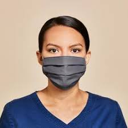

In [ ]:
data[245]

In [ ]:
type(data[245])

numpy.ndarray

In [ ]:
data[245].shape #(height,width, number of color channels(rgb))

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays
x = np.array(data)
y = np.array(labels)


In [ ]:
type(x)

numpy.ndarray

In [ ]:
type(y)

numpy.ndarray

In [ ]:
print(x.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(y)

[1 1 1 ... 0 0 0]


In [ ]:
print(x)

[[[[190  90  24]
   [167  62  11]
   [134  44  11]
   ...
   [ 48  31  19]
   [ 46  28  14]
   [ 39  22   7]]

  [[191  89  21]
   [170  65  13]
   [129  41   7]
   ...
   [ 39  23  10]
   [ 43  25  10]
   [ 47  29  14]]

  [[193  91  21]
   [169  67  13]
   [127  44   8]
   ...
   [ 36  22   8]
   [ 37  19   5]
   [ 48  27  12]]

  ...

  [[198 191 161]
   [195 189 158]
   [192 185 153]
   ...
   [233 205 164]
   [231 204 157]
   [231 205 155]]

  [[201 193 165]
   [199 192 163]
   [197 190 160]
   ...
   [229 200 149]
   [227 198 145]
   [227 199 143]]

  [[202 196 167]
   [201 195 166]
   [201 194 165]
   ...
   [224 194 133]
   [221 191 132]
   [220 191 134]]]


 [[[249 240 242]
   [248 243 243]
   [247 247 245]
   ...
   [242 238 239]
   [242 238 236]
   [249 244 241]]

  [[249 246 245]
   [244 243 241]
   [245 247 244]
   ...
   [246 244 243]
   [244 242 240]
   [247 243 242]]

  [[246 246 243]
   [246 248 245]
   [250 252 250]
   ...
   [241 240 237]
   [248 247 245]
   [238 236

**Train Test Split**

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
#scaling the data
x_train_scaled = x_train/255
x_test_scaled = x_test/255
# so previously the values were lying between 0 and 255 and now we have made the values lying in range of 0 and 1
# so basically white color would be represented by 1 and black by 0

In [ ]:
x_train_scaled[0]

array([[[0.83529412, 0.80784314, 0.74117647],
        [0.83529412, 0.81176471, 0.74509804],
        [0.83921569, 0.81568627, 0.74509804],
        ...,
        [0.88235294, 0.82745098, 0.79215686],
        [0.87843137, 0.82745098, 0.79215686],
        [0.8745098 , 0.82352941, 0.78823529]],

       [[0.83529412, 0.80784314, 0.74509804],
        [0.83529412, 0.81176471, 0.74901961],
        [0.83921569, 0.81568627, 0.75294118],
        ...,
        [0.88235294, 0.83137255, 0.79607843],
        [0.88235294, 0.83137255, 0.79607843],
        [0.88235294, 0.82745098, 0.79215686]],

       [[0.83529412, 0.80784314, 0.74509804],
        [0.83529412, 0.81176471, 0.74901961],
        [0.83921569, 0.81568627, 0.75294118],
        ...,
        [0.88627451, 0.83529412, 0.8       ],
        [0.88627451, 0.83529412, 0.8       ],
        [0.88627451, 0.83137255, 0.79607843]],

       ...,

       [[0.49019608, 0.32156863, 0.25490196],
        [0.43529412, 0.29411765, 0.24313725],
        [0.36862745, 0

**Building a Convolutional Neural Networks (CNN)**

In [ ]:
import tensorflow as tf
from tensorflow import keras
#basically main use of cnn is that it learns all the patterns with the hlp of conolution networks whereas in other ml model we need to tell them about the model manually

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
num_of_classes = 2 # with_mask and without_mask #defines number of output classes
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))# add a convolution layer of 32 filters,each filter is a 3*3 kernel that scans the image
# use relu because to introduce non-linearity and it removes negative pixel values
#first layer is basically to extract low level features(edges,textures) from images
model.add(keras.layers.MaxPooling2D(pool_size=(2,2))) # reduces spatial dimension(2-D) by half and helps preventing overfitting,basically it reduces computation by lowering the number of parameters
model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu')) # second layer ,basically adds more filters to complex patterns.
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten()) # converts 2D maps to 1D vector as fully connected layers require 1D vector.

model.add(keras.layers.Dense(128,activation='relu')) #first dense(fully connected) layer,helps the model to understand abstract features.
model.add(keras.layers.Dropout(0.5)) #Randomly drops 50% of neurons during training.

model.add(keras.layers.Dense(64,activation='relu'))#second dense layer
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes,activation='sigmoid'))#sigmoid is used mainly in case of binary function
#output layer


In [ ]:
# compile the neural network
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])


In [ ]:
# training the neural network
history = model.fit(x_train_scaled,y_train,validation_split=0.1,epochs=5)


**Model Evaluation**

In [ ]:
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print('Test Accuracy =', accuracy)

In [ ]:
h =  history
#plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')